In [41]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
from scipy.stats import zscore
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve, make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

from pybaselines.polynomial import imodpoly

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_name = 'veinData'

In [9]:
matlab_data = pd.read_csv(f'matlab_2/{file_name}.csv', header=None)
matlab_data

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.000459,0.000842,0.001020,0.001175,0.001227,0.001222,0.001192,0.001119,0.001023,0.000914,...,0.001170,0.001078,0.000901,0.000693,0.000548,0.000513,0.000586,0.000751,0.001041,0.001157
1,0.000805,0.001099,0.001318,0.001391,0.001313,0.001203,0.001067,0.000907,0.000822,0.000804,...,0.000936,0.000883,0.000836,0.000847,0.000887,0.000937,0.000925,0.000876,0.000802,0.000725
2,0.000960,0.001078,0.001190,0.001186,0.001081,0.000913,0.000676,0.000456,0.000343,0.000334,...,0.000931,0.000857,0.000702,0.000579,0.000582,0.000770,0.000766,0.000658,0.000538,0.000000
3,0.001285,0.001458,0.001437,0.001432,0.001361,0.001247,0.001122,0.001004,0.000892,0.000821,...,0.000754,0.000808,0.000859,0.000970,0.001111,0.001264,0.001327,0.001307,0.001220,0.001039
4,0.000826,0.001054,0.001240,0.001285,0.001196,0.001090,0.000964,0.000853,0.000852,0.000905,...,0.000849,0.000844,0.000728,0.000855,0.000999,0.001026,0.001050,0.001058,0.000838,0.000797
5,0.001059,0.000890,0.000785,0.000768,0.000846,0.000877,0.000857,0.000853,0.000819,0.000758,...,0.001038,0.001013,0.000943,0.001016,0.001077,0.001036,0.001045,0.001064,0.000940,0.000993
6,0.001207,0.001342,0.001672,0.001719,0.001613,0.001505,0.001347,0.001162,0.001127,0.001155,...,0.000591,0.000626,0.000686,0.000744,0.000824,0.000937,0.000959,0.000923,0.000918,0.000682
7,0.000570,0.000902,0.000964,0.000990,0.000880,0.000779,0.000728,0.000704,0.000737,0.000825,...,0.000641,0.000645,0.000668,0.000667,0.000672,0.000707,0.000767,0.000832,0.000913,0.001020
8,0.000585,0.000847,0.000989,0.001062,0.001034,0.001008,0.001003,0.000971,0.000952,0.000973,...,0.001010,0.000986,0.000920,0.000802,0.000729,0.000761,0.000794,0.000820,0.000895,0.000787
9,0.000304,0.000582,0.000750,0.000907,0.001007,0.001020,0.000965,0.000887,0.000805,0.000757,...,0.000616,0.000560,0.000490,0.000503,0.000586,0.000730,0.000828,0.000872,0.000890,0.000681


In [10]:
matlab_data = matlab_data.to_numpy()

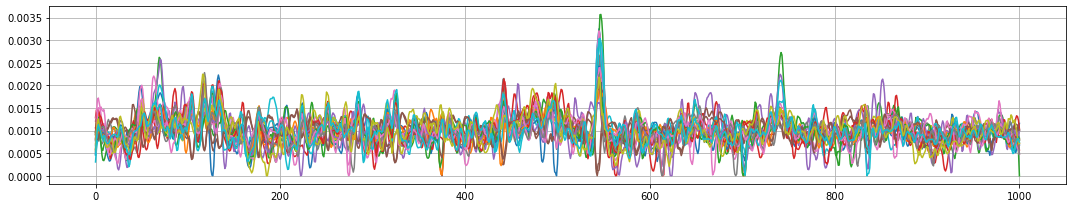

In [13]:
plt.figure(figsize=(15,3))
plt.grid()

for observation in matlab_data:
    plt.plot(observation, label=f'Observation {observation[0]}')
plt.show()

## Removing flourences noise with pybaseline's iterative baseline

In [18]:
def remove_baseline(observation):
    polynomial_baseline = imodpoly(observation, poly_order=5, tol=0.05, max_iter=1000)[0]
    return observation - polynomial_baseline

In [19]:
data = pd.read_csv(f'original_raman_spectroscopy/vein.csv', header=1)
data.drop(['ramanShift', 'NaN'], axis=1, inplace=True)
data = data.iloc[:, 800:1800]
data = data.to_numpy()
data[0]

array([191.2475708 , 195.5560272 , 198.0248413 , 198.8331604 ,
       199.1046936 , 198.1161652 , 197.1670898 , 196.7174927 ,
       196.2678985 , 194.3667419 , 192.2073944 , 190.5545319 ,
       189.2041382 , 188.10849   , 187.3878571 , 186.700354  ,
       186.1595551 , 185.6187592 , 187.6023499 , 189.6766418 ,
       189.5252838 , 188.622879  , 188.6798065 , 189.5827423 ,
       189.6854706 , 188.0592193 , 186.9806854 , 190.6871246 ,
       194.3935608 , 189.2430328 , 183.0016693 , 184.0125885 ,
       188.4474976 , 190.5448608 , 190.0014862 , 189.5763397 ,
       189.4857239 , 189.3363525 , 188.1576477 , 186.9789429 ,
       186.8       , 186.8       , 187.092157  , 187.5460449 ,
       188.8802795 , 191.3327179 , 193.8939422 , 196.8022644 ,
       199.5481323 , 198.1840454 , 196.8199585 , 193.6234985 ,
       190.0747681 , 188.3916107 , 187.7542816 , 186.6312653 ,
       184.9003449 , 184.7110993 , 189.17771   , 193.2303741 ,
       190.129248  , 187.028128  , 186.9146515 , 187.27

In [20]:
new_data = []
for i in range(len(data)):
    new_data.append(remove_baseline(data[i]))

In [21]:
data

array([[191.2475708 , 195.5560272 , 198.0248413 , ...,  59.15124054,
         63.82999878,  65.05268784],
       [262.1858643 , 266.9431122 , 271.2298065 , ...,  91.87278899,
         90.74000244,  88.29462433],
       [180.2089203 , 181.0167572 , 182.0608642 , ...,  60.97762298,
         63.40801468,  55.58280182],
       ...,
       [282.5561218 , 284.6205933 , 286.8745239 , ..., 101.6480621 ,
        108.5540176 ,  98.52796326],
       [585.4418204 , 590.9556318 , 594.1446272 , ..., 225.6394087 ,
        222.9635729 , 221.4788796 ],
       [240.7701238 , 245.1085027 , 249.0548528 , ...,  85.07067298,
         85.62666956,  83.99641737]])

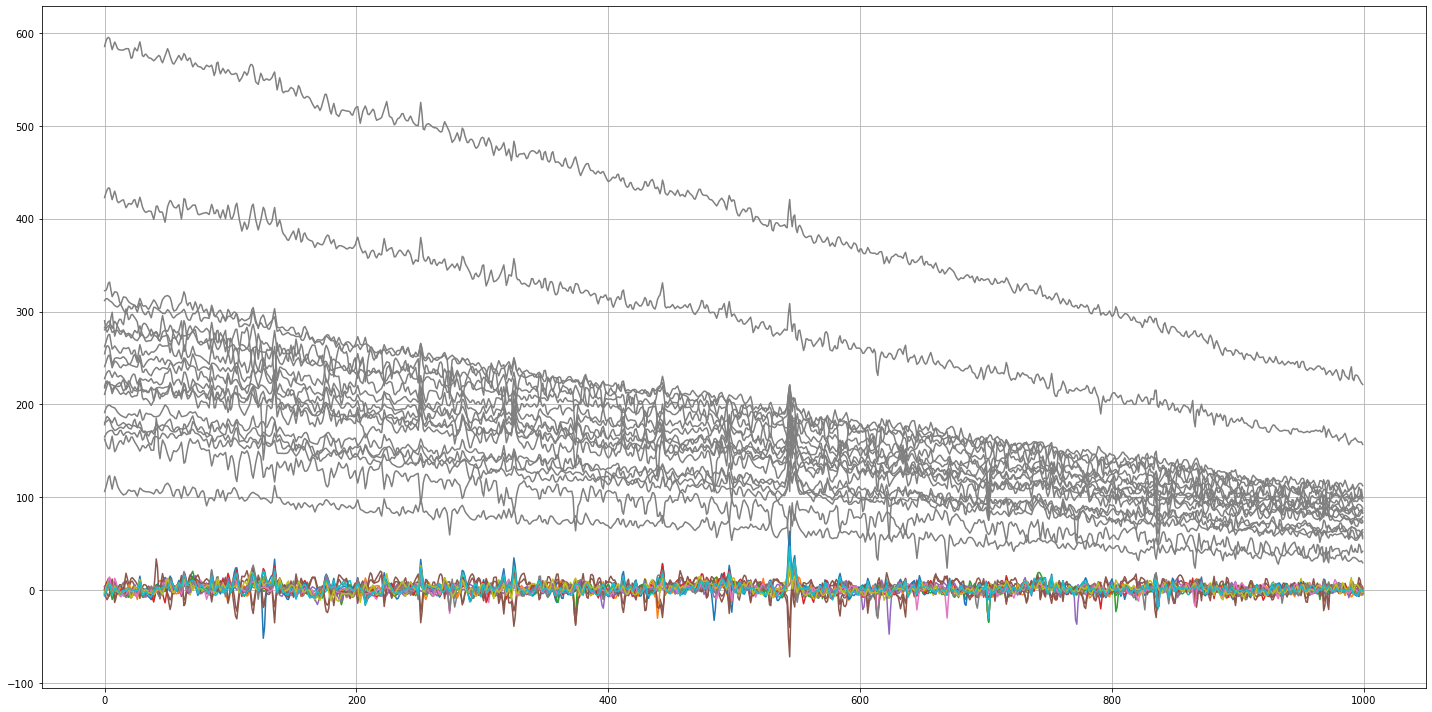

In [22]:
plt.figure(figsize=(20,10))
plt.grid()
for i in range(len(data)):
    plt.plot(data[i], color='gray', label=f'Observation {i}')
    plt.plot(new_data[i], label=f'Observation {i}')
plt.show()

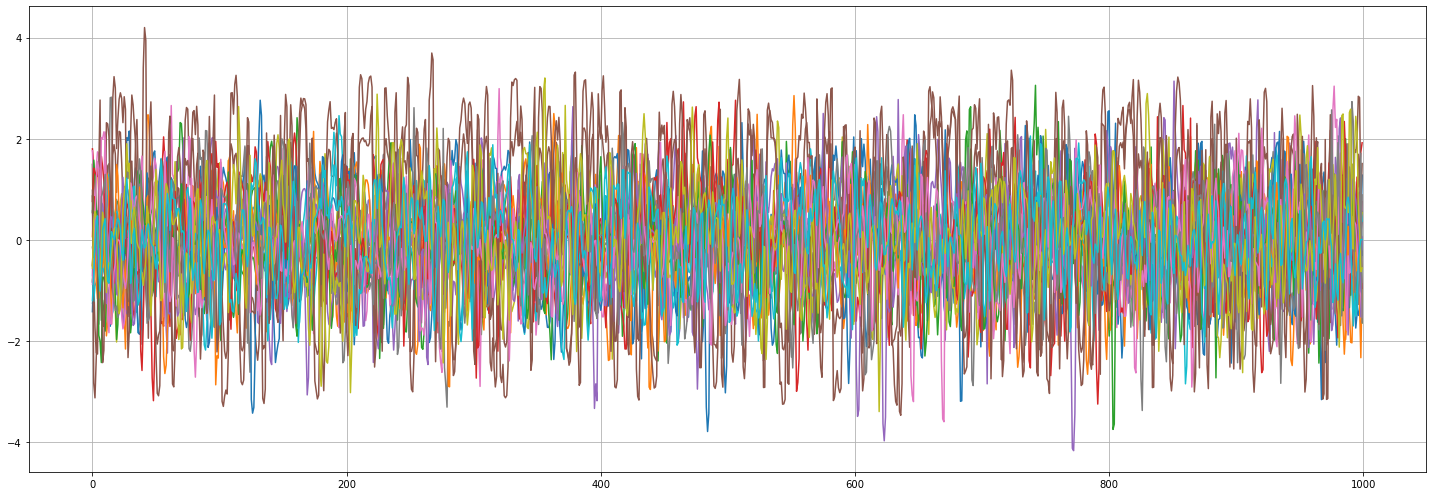

In [33]:
plt.figure(figsize=(20,7))
plt.grid()
for i in range(len(new_data)):
    plt.plot(z_data[i], label=f'Observation {i}')

## Normailization

In [31]:
z_data = zscore(new_data)

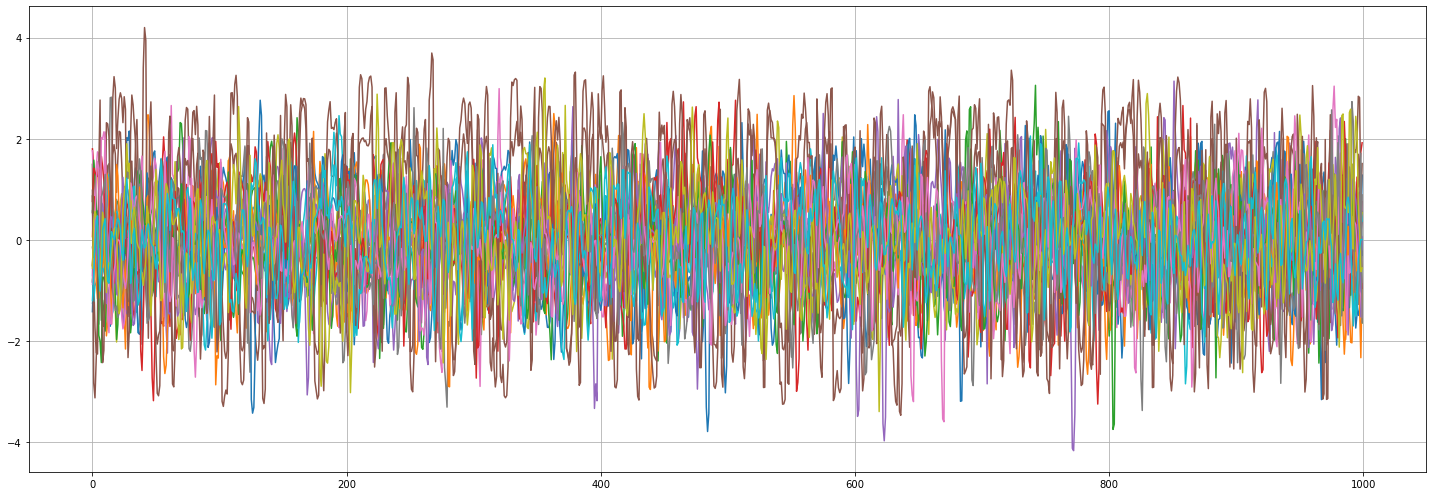

In [158]:
plt.figure(figsize=(20,7))
plt.grid()
for i in range(len(scaled_data)):
    plt.plot(scaled_data[i], label=f'Observation {i}')

In [34]:
n_components = .99
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(z_data)
X_pca

array([[-4.48331377e+00,  7.08253215e-01, -7.83398986e+00,
        -2.15409361e+00,  9.59879815e-01,  3.95049647e+00,
         1.26343990e+01,  9.27142766e-01,  1.08796777e+01,
         7.60801769e+00,  5.63118604e+00,  7.99913221e+00,
         2.52532691e+00, -1.01822788e+01, -1.50853154e-02,
        -3.05435818e+00, -3.44612989e+00, -3.40684399e-01],
       [-1.10225505e+01, -2.25880523e+00, -2.42329034e+00,
         3.87000011e+00, -3.53586925e+00,  2.29908881e-01,
         7.94198476e+00, -9.48202645e+00, -4.31505564e+00,
        -5.21143873e+00, -4.26513641e+00, -9.43002251e-01,
        -1.04863307e+01, -1.15303125e+00,  1.27344892e+01,
        -7.05061086e+00,  1.28037632e+00,  7.79781189e-01],
       [ 6.71067761e-01,  3.64332824e+00, -4.67834492e+00,
         8.76212198e+00, -1.30997121e+00,  5.73668142e+00,
         8.22360757e+00, -5.05585478e+00,  5.28848843e+00,
        -5.14604844e+00, -6.12117221e+00, -4.60225661e+00,
         1.33218286e+01,  8.58566615e+00,  1.45536383e

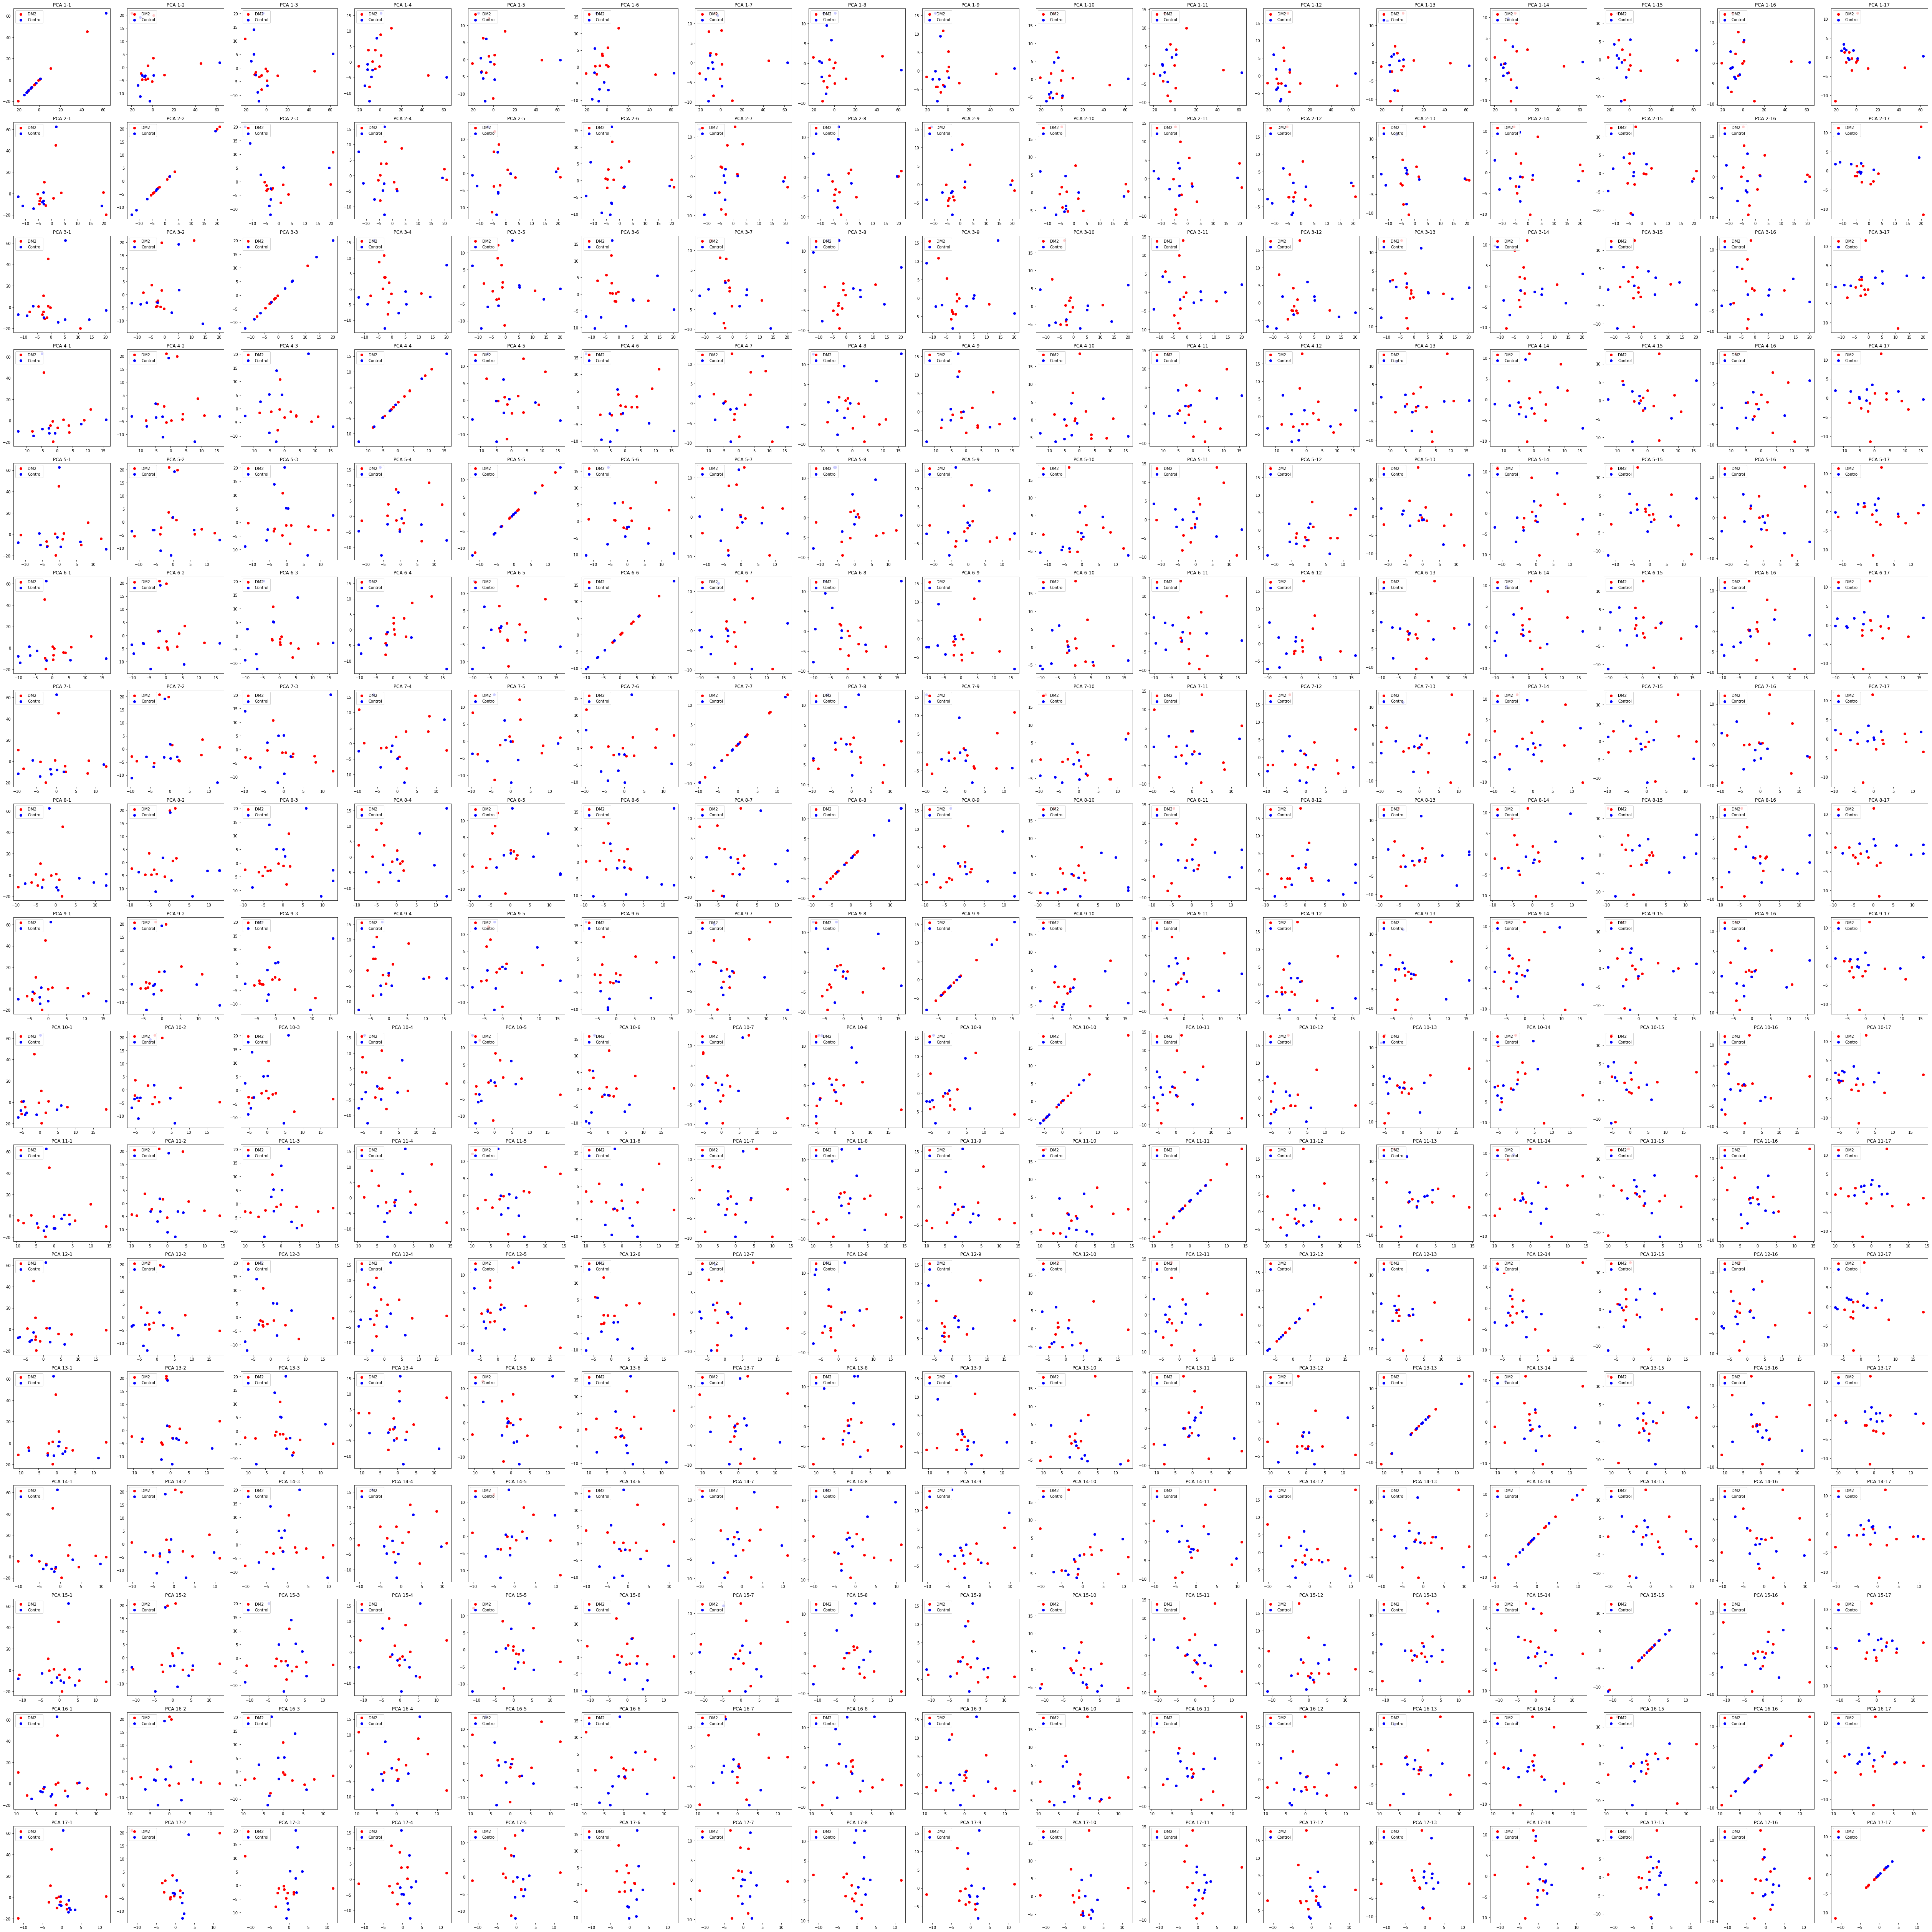

In [35]:
i = 0

fig, axs = plt.subplots(pca.n_components_ - 1, pca.n_components_ - 1, figsize=(70, 70))
for i in range(pca.n_components_ - 1):
    for j in range(pca.n_components_ - 1):
        axs[i, j].scatter(X_pca[:, i][:11], X_pca[:, j][:11], c='red')
        axs[i, j].scatter(X_pca[:, i][11:], X_pca[:, j][11:], c='blue')
        axs[i, j].set_title('PCA ' + str(i+1) + '-' + str(j+1))
        
        axs[i, j].legend(['DM2', 'Control'], loc="upper left")
        

        # axs[i, j].xlabel(f'PC{i + 1}')
        # axs[i, j].ylabel(f'PC{j + 1}')

# plt.title(f'PCA with n_components = {pca.n_components_}')
plt.show()

<StemContainer object of 3 artists>

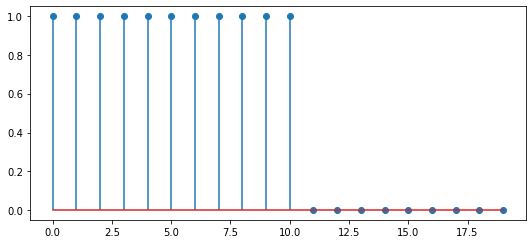

In [36]:
target = pd.read_csv('matlab_raman_preprocessed copy/earData.csv')['has_DM2']
target = np.array([int(x) for x in target])
plt.stem(target)

In [43]:
scoring = {
    "AUC": "roc_auc",
    "Accuracy": make_scorer(accuracy_score)}

param_grid = {
    'C': np.linspace(1e-7, 1000, 20),
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'gamma': ['auto', 'scale'],
    'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(SVC(probability=True), param_grid, refit='AUC', verbose=1, cv=RepeatedStratifiedKFold(n_splits=10, random_state=31), scoring=scoring, n_jobs=-1)
grid.fit(X_pca ,target)

print('Best estimator accuracy according to Grid search (val_accuracy) : ', grid.best_score_)
print('Best estimator parameters according to Grid search : ', grid.best_estimator_.get_params())
print('ROC AUC score : ', roc_auc_score(target, grid.best_estimator_.predict_proba(X_pca)[:, 1]))

print(classification_report(target, grid.best_estimator_.predict(X_pca)))
plot_confusion_matrix(grid.best_estimator_, X_pca, target, display_labels=['Control', 'DM2'], cmap='cividis')
plt.title(f'PCA-SVM with {pca.n_components_} components')
plt.savefig('pca_confusion_matrix.pdf')
plt.show()

Fitting 100 folds for each of 1600 candidates, totalling 160000 fits
